In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the dataset 
health = pd.read_excel("D:/GUVI-Data Science/Mainboot_Camp/Projects/Proj1_Healthcare_insights_dashboard/Healtcare-Dataset.xlsx")
health.head()

,Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup Date,Feedback,Billing Amount,Health Insurance Amount
0,23571,2022-12-31,2023-01-12,Viral Infection,General,MRI,Jay Sinha,2023-01-20,5.0,13234,11910.6
1,27781,2023-01-04,2023-01-12,Typhoid,ICU,MRI,Jaya Yaadav,2023-01-16,4.0,12241,11016.9
2,24413,2023-01-05,2023-01-12,Malaria,General,CT Scan,Jay Sinha,2023-01-15,5.0,35255,31729.5
3,27360,2023-01-05,2023-01-12,Flu,Private,X-Ray,Jaya Yaadav,2023-01-19,5.0,6582,5923.8
4,26097,2023-01-06,2023-01-12,Viral Infection,General,Blood Test,Jaya Yaadav,2023-02-06,4.9,4567,4110.3


In [6]:
#converted it into a DataFrame
health = pd.DataFrame(health)

In [5]:
#Data Preprocessing
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient_ID               7157 non-null   int64         
 1   Admit_Date               7157 non-null   datetime64[ns]
 2   Discharge_Date           7157 non-null   datetime64[ns]
 3   Diagnosis                7157 non-null   object        
 4   Bed_Occupancy            7157 non-null   object        
 5   Test                     7157 non-null   object        
 6   Doctor                   7157 non-null   object        
 7   Followup Date            7035 non-null   datetime64[ns]
 8   Feedback                 7157 non-null   float64       
 9   Billing Amount           7157 non-null   int64         
 10  Health Insurance Amount  7157 non-null   float64       
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 615.2+ KB


In [7]:
#To find null values if any
health.isnull().sum()

Patient_ID                   0
Admit_Date                   0
Discharge_Date               0
Diagnosis                    0
Bed_Occupancy                0
Test                         0
Doctor                       0
Followup Date              122
Feedback                     0
Billing Amount               0
Health Insurance Amount      0
dtype: int64

In [8]:
#Dropping the null values
health.dropna(subset=['Followup Date'],inplace=True)
health.isnull().sum()

Patient_ID                 0
Admit_Date                 0
Discharge_Date             0
Diagnosis                  0
Bed_Occupancy              0
Test                       0
Doctor                     0
Followup Date              0
Feedback                   0
Billing Amount             0
Health Insurance Amount    0
dtype: int64

In [9]:
#Changing Health Insurance amount column datatype from float to int
health['Health Insurance Amount'] = health['Health Insurance Amount'].astype(int)
health.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7035 entries, 0 to 7156
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Patient_ID               7035 non-null   int64         
 1   Admit_Date               7035 non-null   datetime64[ns]
 2   Discharge_Date           7035 non-null   datetime64[ns]
 3   Diagnosis                7035 non-null   object        
 4   Bed_Occupancy            7035 non-null   object        
 5   Test                     7035 non-null   object        
 6   Doctor                   7035 non-null   object        
 7   Followup Date            7035 non-null   datetime64[ns]
 8   Feedback                 7035 non-null   float64       
 9   Billing Amount           7035 non-null   int64         
 10  Health Insurance Amount  7035 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 659.5+ KB


In [10]:
#Establishing the connection between mysql workbench and vscode 
mydb = pymysql.connect(
    host ="localhost",
    user = "root",
    password = "root",
    database = "healthcare_insights",
    autocommit=True
)
mycursor = mydb.cursor()

In [19]:
#Creating a table
table_query = """
CREATE TABLE if not exists health(
                 Patient_ID INT PRIMARY KEY,
                 Admit_Date DATE,
                 Discharge_Date DATE,
                 Diagnosis VARCHAR(50),
                 Bed_Occupancy VARCHAR(50),
                 Test VARCHAR(50),
                 Doctor VARCHAR(50),
                 Followup_Date DATE,
                 Feedback FLOAT,
                 Billing_Amount FLOAT,
                 Health_Insurance_Amount FLOAT
);
"""

mycursor.execute(table_query)
print('Table Created sucessfully')


Table Created sucessfully


In [31]:
#Inserting columns and values from dataset into the health table
for _,row in health.iterrows():
    insert_query = """
    INSERT INTO health(Patient_ID,Admit_Date,Discharge_Date,Diagnosis,Bed_Occupancy,Test,Doctor,Followup_Date,Feedback,Billing_Amount,Health_Insurance_Amount)
    VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
    """
    mycursor.execute(insert_query,(row['Patient_ID'],row['Admit_Date'],row['Discharge_Date'],row['Diagnosis'],row['Bed_Occupancy'],row['Test'],row['Doctor'],row['Followup Date'],row['Feedback'],row['Billing Amount'],row['Health Insurance Amount']))

In [11]:
#SQL Analysis
#1) Analyze monthly patient admissions to identify trends over time.
patient_admit = """
SELECT 
    DATE_FORMAT(Admit_Date,'%Y-%m') AS admission_month,
    COUNT(Patient_ID) as total_admissions
FROM
    health
GROUP BY
    DATE_FORMAT(Admit_Date,'%Y-%m')
ORDER BY
    admission_month;
"""
mycursor.execute(patient_admit)
columns = [column[0] for column in mycursor.description]  #This line is used to get the columns names
results = mycursor.fetchall()
df = pd.DataFrame(results, columns=columns)
print(df)

   admission_month  total_admissions
0          2022-12                61
1          2023-01               590
2          2023-02               497
3          2023-03               609
4          2023-04               493
5          2023-05               509
6          2023-06               466
7          2023-07               505
8          2023-08               513
9          2023-09               458
10         2023-10               501
11         2023-11               472
12         2023-12               524
13         2024-01               475
14         2024-02               330
15         2024-03                32


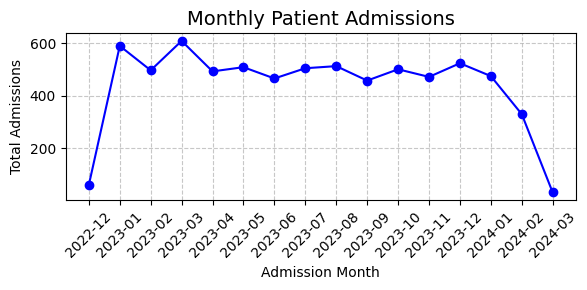

In [10]:
#Using Line Chart we are visualizing the data for sql1
plt.figure(figsize=(6, 3))
plt.plot(df['admission_month'], df['total_admissions'],marker = 'o', color='b')
plt.title('Monthly Patient Admissions', fontsize=14)
plt.xlabel('Admission Month')
plt.ylabel('Total Admissions')
plt.xticks(rotation=45) #This line is used to avoid overlapping in x-axis
plt.grid(True, linestyle='--', alpha=0.7) #This line provides grid in the layout
plt.tight_layout() #This line is used to fit all the elements to look in readable form
plt.show()

In [13]:
#2)Identify the top 5 most common diagnoses.
diagnosis = """
SELECT 
    Diagnosis,
    COUNT(*) as diagnosis_count
FROM 
    health
GROUP BY 
    Diagnosis
ORDER BY 
    diagnosis_count DESC
LIMIT 5;
"""
mycursor.execute(diagnosis)
columns1 = [column[0] for column in mycursor.description]
results1 = mycursor.fetchall()
diag1 = pd.DataFrame(results1,columns=columns1)

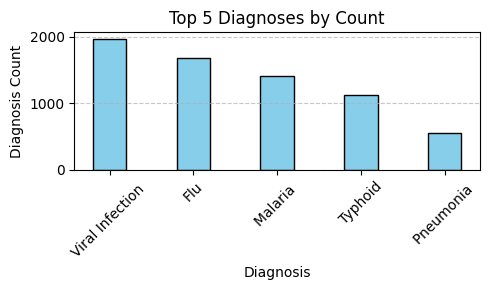

In [ ]:
#Bar Chart for sql2
plt.figure(figsize=(5, 3))
plt.bar(diag1['Diagnosis'], diag1['diagnosis_count'], color='skyblue', edgecolor='black',width = 0.4)
plt.title('Top 5 Diagnoses by Count')
plt.xlabel('Diagnosis')
plt.ylabel('Diagnosis Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines only on the y-axis
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [11]:
#3) Analyze the distribution of bed occupancy types.
bed_occupancy = """
SELECT 
    Bed_Occupancy,
    COUNT(*) as bed_occupancy
FROM 
    health
GROUP BY
    Bed_Occupancy
ORDER BY
    bed_occupancy;
"""
mycursor.execute(bed_occupancy)
col_bed = [column[0] for column in mycursor.description]
res_bed = mycursor.fetchall()
bed_occ_df = pd.DataFrame(res_bed,columns=col_bed)
print(bed_occ_df)

  Bed_Occupancy  bed_occupancy
0           ICU           1175
1       General           2341
2       Private           3519


C:\Users\dell\AppData\Local\Temp\ipykernel_4412\548203533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bed_occ_df["Bed_Occupancy"], y=bed_occ_df["bed_occupancy"], palette="viridis")


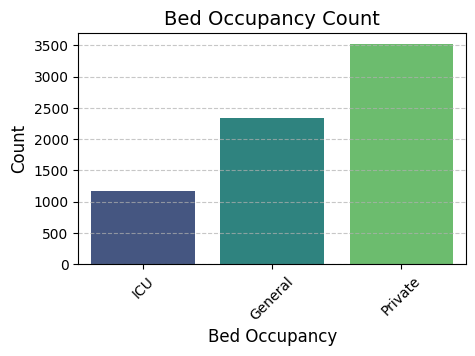

In [ ]:
#Bar chart for sql3
plt.figure(figsize=(5, 3))
sns.barplot(x=bed_occ_df["Bed_Occupancy"], y=bed_occ_df["bed_occupancy"], palette="viridis")
plt.title("Bed Occupancy Count", fontsize=14)
plt.xlabel("Bed Occupancy", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [14]:
#4)Analyze the average and maximum length of stay for patients.
stay = """
SELECT
    AVG(DATEDIFF(Discharge_Date,Admit_Date)) AS avg_length_stay,
    MAX(DATEDIFF(Discharge_Date,Admit_Date)) AS max_length_stay
FROM
    health;
"""
mycursor.execute(stay)
col_stay = [column[0] for column in mycursor.description]
res_stay = mycursor.fetchall()
stay_df = pd.DataFrame(res_stay,columns=col_stay)
print(stay_df)

  avg_length_stay  max_length_stay
0          8.2523               45


C:\Users\dell\AppData\Local\Temp\ipykernel_4412\2314153932.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="coolwarm")


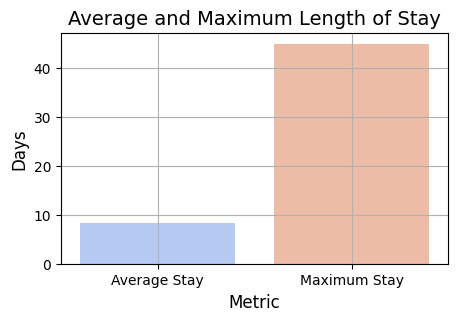

In [19]:
#Bar chart for sql4
metrics = ["Average Stay", "Maximum Stay"]
values = stay_df.iloc[0].tolist()
#print(values)
plt.figure(figsize=(5, 3))
sns.barplot(x=metrics, y=values, palette="coolwarm")
plt.title("Average and Maximum Length of Stay", fontsize=14)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Days", fontsize=12) 
plt.grid()
plt.show()


In [21]:
#5)Identify the seasonality in admissions based on the month.
season_admission = """
SELECT
    DATE_FORMAT(Admit_Date,'%Y-%m') as admission_month,
    COUNT(*) as total_admissions
FROM
    health
GROUP BY
    admission_month
ORDER BY
    admission_month;
"""
mycursor.execute(season_admission)
col_season = [column[0] for column in mycursor.description]
res_season = mycursor.fetchall()
season_admission_df = pd.DataFrame(res_season,columns=col_season)
print(season_admission_df)

   admission_month  total_admissions
0          2022-12                61
1          2023-01               590
2          2023-02               497
3          2023-03               609
4          2023-04               493
5          2023-05               509
6          2023-06               466
7          2023-07               505
8          2023-08               513
9          2023-09               458
10         2023-10               501
11         2023-11               472
12         2023-12               524
13         2024-01               475
14         2024-02               330
15         2024-03                32


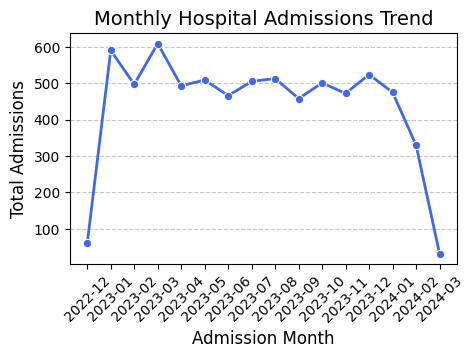

In [ ]:
#Line chart for sql5
plt.figure(figsize=(5, 3))
sns.lineplot(
    data=season_admission_df,
    x="admission_month",
    y="total_admissions",
    marker="o",  # Adds markers for each data point
    color="royalblue",
    linewidth=2
)
plt.xticks(rotation=45)
plt.xlabel("Admission Month", fontsize=12)
plt.ylabel("Total Admissions", fontsize=12)
plt.title("Monthly Hospital Admissions Trend", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [31]:
#6) Longest stay of patient in hospital
long_stay = """
SELECT
    Patient_ID,Admit_Date,Discharge_Date,Diagnosis,
    DATEDIFF(Discharge_Date,Admit_Date) AS stay_duration
FROM
    health
ORDER BY
    stay_duration DESC
LIMIT 10;
"""
mycursor.execute(long_stay)
col_long_stay = [column[0] for column in mycursor.description]
res_long_stay = mycursor.fetchall()
long_stay_df = pd.DataFrame(res_long_stay,columns=col_long_stay)
print(long_stay_df)

   Patient_ID  Admit_Date Discharge_Date         Diagnosis  stay_duration
0       24041  2023-01-16     2023-03-02               Flu             45
1       23888  2023-10-11     2023-11-25  Viral Infection              45
2       23939  2023-12-01     2024-01-15        Pneumonia              45
3       23990  2024-01-21     2024-03-06               Flu             45
4       23582  2022-12-09     2023-01-23               Flu             45
5       23735  2023-05-11     2023-06-25          Malaria              45
6       23633  2023-01-29     2023-03-15           Typhoid             45
7       23786  2023-07-01     2023-08-15  Viral Infection              45
8       23684  2023-03-21     2023-05-05               Flu             45
9       23837  2023-08-21     2023-10-05  Viral Infection              45


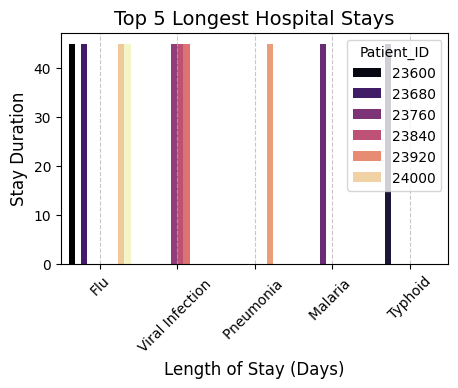

In [ ]:
#Bar plot for sql6
plt.figure(figsize=(5, 3))
sns.barplot(
    data=long_stay_df,
    x="Diagnosis",
    y="stay_duration",
    hue='Patient_ID',
    palette="magma"
)
plt.title("Top 5 Longest Hospital Stays", fontsize=14)
plt.xlabel("Length of Stay (Days)", fontsize=12)
plt.ylabel("Stay Duration", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [36]:
#7)Doctors with most patients
doct = """
SELECT
    Doctor,
    COUNT(Patient_ID) AS patient_count
FROM
    health
GROUP BY 
    Doctor
ORDER BY
    patient_count DESC;
"""
mycursor.execute(doct)
col_doct = [column[0] for column in mycursor.description]
res_doct = mycursor.fetchall()
doct_df = pd.DataFrame(res_doct,columns=col_doct)
print(doct_df)

           Doctor  patient_count
0        Mark Joy           1013
1  Naresh Goyenka           1006
2          Ravi D           1006
3       Jay Sinha           1004
4     Jaya Yaadav           1004
5    Tejas Saxena           1002
6     Niki Sharma           1000


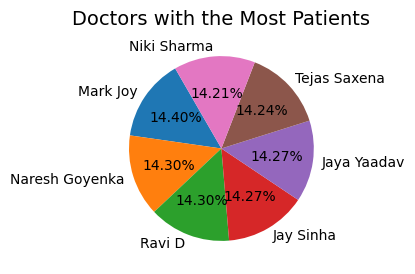

In [ ]:
#Pie chart for sql7
plt.figure(figsize=(5, 3))
plt.pie(
    doct_df["patient_count"], 
    labels=doct_df["Doctor"], 
    autopct="%.2f%%",  # Display percentage values
    startangle=120, 
)
plt.title("Doctors with the Most Patients", fontsize=14)
plt.show()

In [42]:
#8) Total Billing_Amount and Health_Insurance_Amount by diagnosis
diag_amount = """
SELECT
    Diagnosis,
    year(Admit_Date) as Years,
    SUM(Billing_Amount) AS total_billing,
    SUM(Health_Insurance_Amount) AS insurance_billing
FROM
    health
GROUP BY 
    Diagnosis,Years
ORDER BY 
    total_billing DESC,Years DESC;
"""
mycursor.execute(diag_amount)
col_diag_amt = [column[0] for column in mycursor.description]
res_diag_amt = mycursor.fetchall()
diag_amount_df = pd.DataFrame(res_diag_amt,columns=col_diag_amt)
pd.options.display.float_format = '{:,.2f}'.format #It is Globally called pandas operation 
diag_amount_df = diag_amount_df.sort_values("Years").reset_index(drop=True)
print(diag_amount_df)

           Diagnosis  Years  total_billing  insurance_billing
0                Flu   2022     447,105.00         402,394.51
1   Viral Infection    2022     367,097.00         330,387.30
2           Malaria    2022     308,689.00         277,820.10
3            Typhoid   2022     289,011.00         260,109.90
4           Fracture   2022      77,665.00          69,898.50
5         Pneumonia    2022     123,595.00         111,235.50
6   Viral Infection    2023  45,765,204.00      41,188,683.97
7                Flu   2023  39,452,887.00      35,507,598.60
8           Fracture   2023   6,571,342.00       5,914,207.86
9         Pneumonia    2023  13,014,873.00      11,713,385.81
10          Malaria    2023  32,677,815.00      29,410,033.78
11           Typhoid   2023  25,960,932.00      23,364,838.97
12          Fracture   2024     817,285.00         735,556.51
13        Pneumonia    2024   1,629,808.00       1,466,827.21
14               Flu   2024   5,117,992.00       4,606,192.86
15  Vira

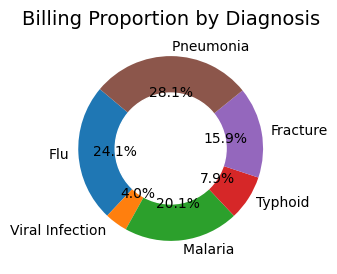

In [ ]:
#Donut chart for sql8
plt.figure(figsize=(5, 3))
plt.pie(
    diag_amount_df.groupby("Diagnosis")["total_billing"].sum(), 
    labels=diag_amount_df["Diagnosis"].unique(), 
    autopct="%1.1f%%", 
    startangle=140, 
)

# Adding a white center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.6, color="white")
plt.gca().add_artist(centre_circle)

plt.title("Billing Proportion by Diagnosis", fontsize=14)
plt.show()

In [49]:
#9) Top 3 Diagnosis with highest billing
top_diag = """
SELECT
    Diagnosis,
    SUM(Billing_Amount) AS total_billing
FROM
    health
GROUP BY
    Diagnosis
ORDER BY
    total_billing DESC
LIMIT 3;
"""
mycursor.execute(top_diag)
col_top_diag = [column[0] for column in mycursor.description]
res_top_diag = mycursor.fetchall()
top_diag_df = pd.DataFrame(res_top_diag,columns=col_top_diag)
print(top_diag_df)

          Diagnosis  total_billing
0  Viral Infection   52,532,883.00
1               Flu  45,017,984.00
2          Malaria   37,568,308.00


C:\Users\dell\AppData\Local\Temp\ipykernel_4412\3156590602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


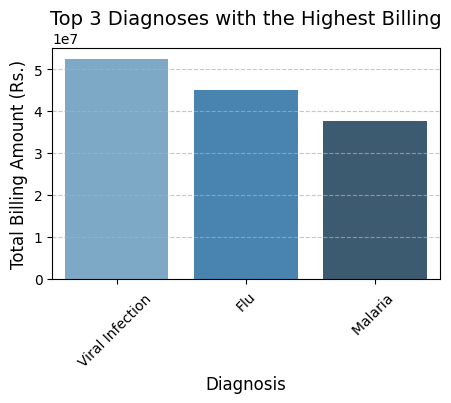

In [ ]:
#Bar plot for sql9
plt.figure(figsize=(5, 3))
sns.barplot(
    data=top_diag_df, 
    x="Diagnosis", 
    y="total_billing", 
    palette="Blues_d"
)
plt.title("Top 3 Diagnoses with the Highest Billing", fontsize=14)
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel("Total Billing Amount (Rs.)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [54]:
#10) Analyze the month wise billing amount
month_bill = """
SELECT 
    YEAR(Admit_Date) as Year,
    MONTH(Admit_Date) as Month,
    SUM(Billing_Amount) AS Total_Billing_Amount
FROM
    health
GROUP BY 
    Year,Month
ORDER BY
    Year DESC,Month DESC
"""
mycursor.execute(month_bill)
col_month_bill = [column[0] for column in mycursor.description]
res_month_bill = mycursor.fetchall()
month_bill_df = pd.DataFrame(res_month_bill,columns=col_month_bill)
month_bill_df = month_bill_df.sort_values(["Year", "Month"]).reset_index(drop=True)#Reset Index is used to sort the index value
print(month_bill_df)

    Year  Month  Total_Billing_Amount
0   2022     12          1,613,162.00
1   2023      1         15,712,160.00
2   2023      2         13,198,088.00
3   2023      3         16,213,144.00
4   2023      4         13,325,323.00
5   2023      5         13,447,264.00
6   2023      6         12,485,466.00
7   2023      7         13,378,735.00
8   2023      8         13,697,418.00
9   2023      9         12,189,231.00
10  2023     10         13,169,852.00
11  2023     11         12,844,610.00
12  2023     12         13,781,762.00
13  2024      1         12,600,647.00
14  2024      2          8,454,186.00
15  2024      3          1,000,912.00


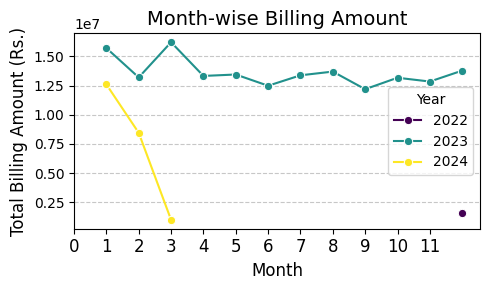

In [ ]:
#Line plot for sql10
plt.figure(figsize=(5, 3))
sns.lineplot(
    data=month_bill_df, 
    x="Month", 
    y="Total_Billing_Amount", 
    hue="Year", 
    marker="o", 
    palette="viridis"
)

plt.title("Month-wise Billing Amount", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Billing Amount (Rs.)", fontsize=12)
plt.xticks(ticks=range(0, 12), fontsize=12)
plt.legend(title="Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [59]:
#11) Total Billing and Insurance amount by bed occupancy
bed_bill = """
SELECT 
    Bed_Occupancy,
    SUM(Billing_Amount) AS Total_Billing, 
    SUM(Health_Insurance_amount) AS Total_Insurance
FROM 
    health
GROUP BY 
    Bed_Occupancy
ORDER BY 
    Total_Billing DESC;
"""
mycursor.execute(bed_bill)
col_bed_bill = [column[0] for column in mycursor.description]
res_bed_bill = mycursor.fetchall()
bed_bill_df = pd.DataFrame(res_bed_bill,columns=col_bed_bill)
pd.options.display.float_format = '{:,.2f}'.format #It is Globally called pandas operation 
print(bed_bill_df)

  Bed_Occupancy  Total_Billing  Total_Insurance
0       Private  85,242,976.00    76,718,679.18
1       General  62,080,657.00    55,872,591.77
2           ICU  39,788,327.00    35,809,494.53


<Figure size 600x300 with 0 Axes>

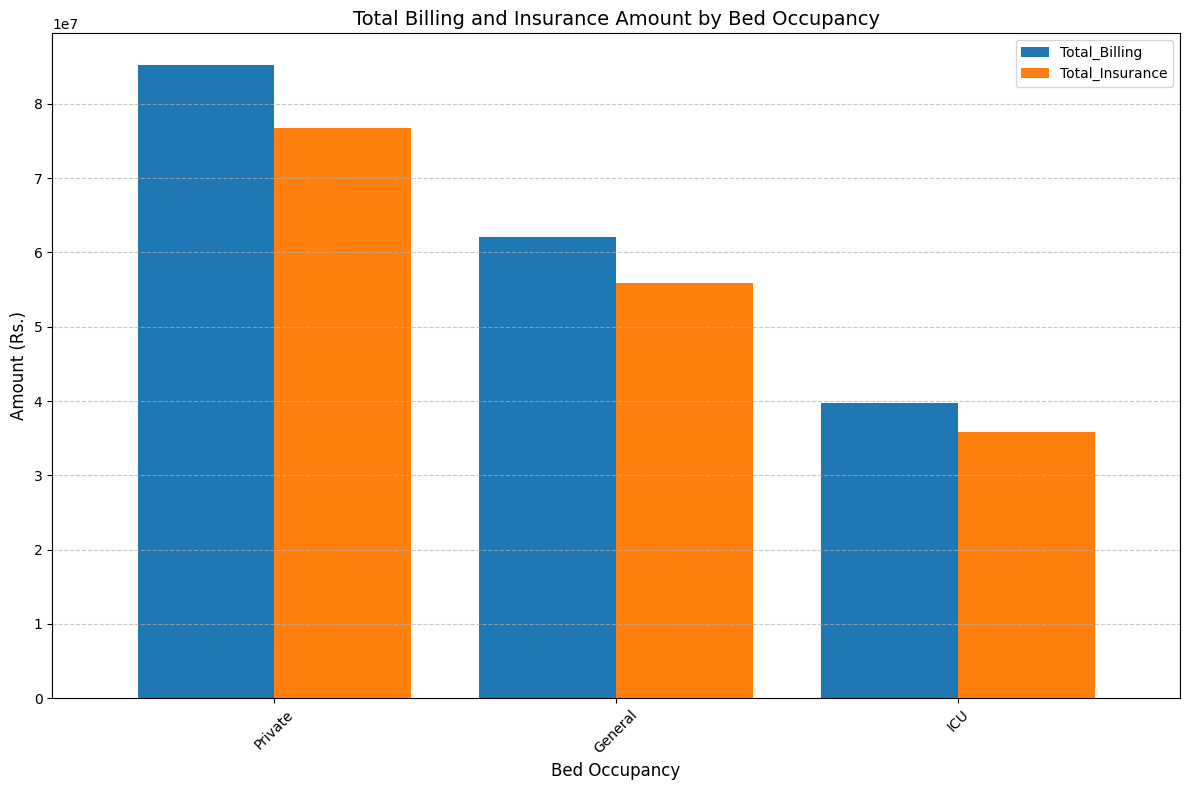

In [63]:
#Side by side bar chart for sql11
plt.figure(figsize=(6,3))
bed_bill_df.set_index("Bed_Occupancy")[["Total_Billing", "Total_Insurance"]].plot(kind="bar", figsize=(12, 8), width=0.8)

plt.title("Total Billing and Insurance Amount by Bed Occupancy", fontsize=14)
plt.xlabel("Bed Occupancy", fontsize=12)
plt.ylabel("Amount (Rs.)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [64]:
#12) Diagnosis with total billing amount where bed occupancy = 'Private'
bed_diag = """
SELECT 
    Diagnosis, 
    Bed_Occupancy, 
    SUM(Billing_Amount) AS Total_Billing
FROM 
    health
Where 
    Bed_Occupancy = 'Private'
GROUP BY 
    Diagnosis, Bed_Occupancy
ORDER BY 
    Total_Billing DESC;
"""
mycursor.execute(bed_diag)
col_bed_diag = [column[0] for column in mycursor.description]
res_bed_diag = mycursor.fetchall()
bed_diag_df = pd.DataFrame(res_bed_diag,columns=col_bed_diag)
print(bed_diag_df)

          Diagnosis Bed_Occupancy  Total_Billing
0  Viral Infection        Private  24,111,757.00
1               Flu       Private  20,692,565.00
2          Malaria        Private  17,195,111.00
3           Typhoid       Private  13,155,900.00
4        Pneumonia        Private   6,648,179.00
5          Fracture       Private   3,439,464.00


C:\Users\dell\AppData\Local\Temp\ipykernel_4412\172367634.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


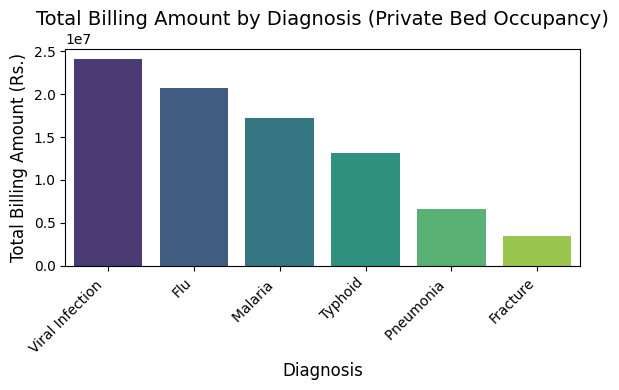

In [67]:
#Bar plot for sql12
plt.figure(figsize=(6, 4))
sns.barplot(
    data=bed_diag_df, 
    x="Diagnosis", 
    y="Total_Billing", 
    palette="viridis"
)
plt.title("Total Billing Amount by Diagnosis (Private Bed Occupancy)", fontsize=14)
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel("Total Billing Amount (Rs.)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [68]:
#13)Month wise bed occupancy list
month_bed = """
SELECT 
    DATE_FORMAT(Admit_Date,'%Y-%m') AS admission_month,
    Bed_Occupancy,
    COUNT(*) as bed_occupancy
FROM
    health
GROUP BY
    admission_month,Bed_Occupancy
ORDER BY
    admission_month,bed_occupancy
"""
mycursor.execute(month_bed)
col_month_bed = [column[0] for column in mycursor.description]
res_month_bed = mycursor.fetchall()
month_bed_df = pd.DataFrame(res_month_bed,columns=col_month_bed)
print(month_bed_df)

   admission_month Bed_Occupancy  bed_occupancy
0          2022-12           ICU             11
1          2022-12       General             20
2          2022-12       Private             30
3          2023-01           ICU             98
4          2023-01       General            197
5          2023-01       Private            295
6          2023-02           ICU             83
7          2023-02       General            165
8          2023-02       Private            249
9          2023-03           ICU            101
10         2023-03       General            203
11         2023-03       Private            305
12         2023-04           ICU             82
13         2023-04       General            165
14         2023-04       Private            246
15         2023-05           ICU             85
16         2023-05       General            169
17         2023-05       Private            255
18         2023-06           ICU             78
19         2023-06       General        

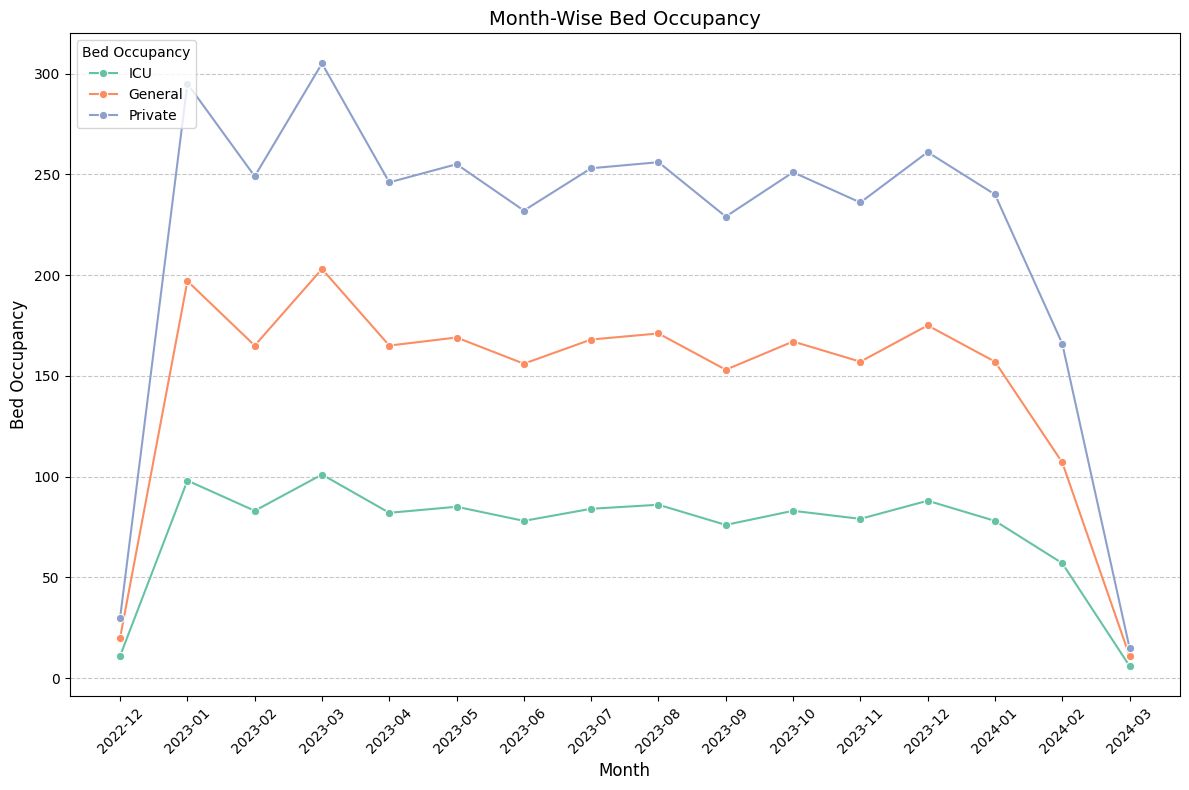

In [ ]:
#Line plots for sql13
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=month_bed_df,
    x="admission_month",
    y="bed_occupancy",
    hue="Bed_Occupancy",
    marker="o",
    palette="Set2"
)

# Adding titles and labels
plt.title("Month-Wise Bed Occupancy", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Bed Occupancy", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Bed Occupancy", loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [73]:
#14)Patient count with Avg length of stay by diagnosis
avg_los = """
SELECT 
    Diagnosis,
    COUNT(Patient_ID) AS Patient_Count,
    AVG(DATEDIFF(Discharge_Date, Admit_Date)) AS AVG_LOS
FROM 
    health
GROUP BY 
    Diagnosis
ORDER BY 
    Patient_Count DESC;
"""
mycursor.execute(avg_los)
col_avg_los = [column[0] for column in mycursor.description]
res_avg_los = mycursor.fetchall()
avg_los_df = pd.DataFrame(res_avg_los,columns=col_avg_los)
print(avg_los_df)

          Diagnosis  Patient_Count AVG_LOS
0  Viral Infection            1971  8.4176
1               Flu           1684  8.0748
2          Malaria            1413  8.4607
3           Typhoid           1123  8.0846
4        Pneumonia             560  7.9393
5          Fracture            284  8.4014


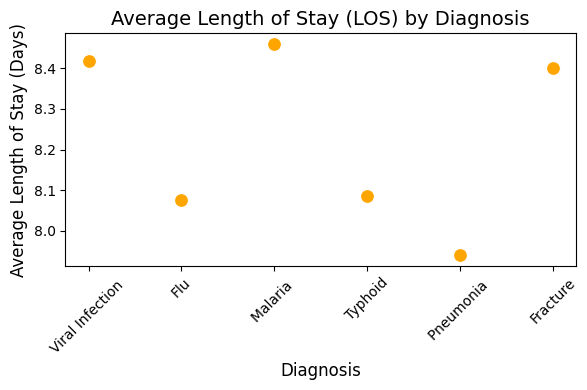

In [ ]:
#Scatter plot for sql14
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=avg_los_df,
    x="Diagnosis",
    y="AVG_LOS",
    s=100, 
    color="orange", 
    marker="o"
)
plt.title("Average Length of Stay (LOS) by Diagnosis", fontsize=14)
plt.xlabel("Diagnosis", fontsize=12)
plt.ylabel("Average Length of Stay (Days)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
#15) Number of Patients who underwent each type of Tests
test_count = """
SELECT
    Test, 
    COUNT(*) AS Test_Count 
FROM 
    health
GROUP BY 
    Test
ORDER BY 
    Test_Count DESC;
"""
mycursor.execute(test_count)
col_test_count = [column[0] for column in mycursor.description]
res_test_count = mycursor.fetchall()
test_count_df = pd.DataFrame(res_test_count,columns=col_test_count)
print(test_count_df)

         Test  Test_Count
0  Blood Test        2205
1         MRI        1758
2     CT Scan        1311
3  Ultrasound         882
4       X-Ray         879


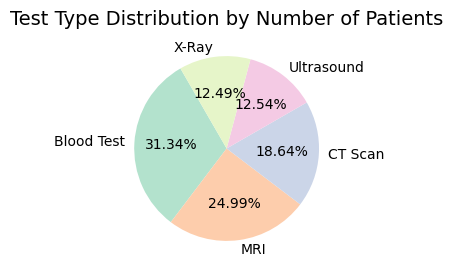

In [ ]:
#Pie chart for sql15
plt.figure(figsize=(5,3))
plt.pie(
    test_count_df["Test_Count"], 
    labels=test_count_df["Test"], 
    autopct='%.2f%%', 
    startangle=120, 
    colors=plt.cm.Pastel2.colors #From stackoverflow.com
)
plt.title("Test Type Distribution by Number of Patients", fontsize=14)
plt.show()

In [51]:
#16) Average billing amount for each test type
avg_test = """
SELECT 
    Test, 
    AVG(Billing_Amount) AS Avg_Billing_Amount 
FROM 
    health
GROUP BY 
    Test
ORDER BY 
    Avg_Billing_Amount DESC;
"""
mycursor.execute(avg_test)
col_avg_test = [column[0] for column in mycursor.description]
res_avg_test = mycursor.fetchall()
avg_test_df = pd.DataFrame(res_avg_test,columns=col_avg_test)
print(avg_test_df)

         Test  Avg_Billing_Amount
0  Ultrasound           64,863.04
1     CT Scan           46,894.80
2         MRI           29,677.30
3       X-Ray            5,942.77
4  Blood Test            5,001.04


In [52]:
#Business Use Cases
#1) Treatment and Service Trends
#(i) Understand the frequency and popularity of treatments or procedures.
freq = """
SELECT 
    YEAR(Admit_Date) AS Year,
    Diagnosis, 
    COUNT(*) AS Frequency
FROM 
    health
GROUP BY 
    YEAR(Admit_Date), Diagnosis
ORDER BY 
    Year ASC, Frequency DESC;
"""
mycursor.execute(freq)
col_buc1 = [column[0] for column in mycursor.description]
res_buc1 = mycursor.fetchall()
freq1 = pd.DataFrame(res_buc1,columns=col_buc1)
print(freq1)

    Year         Diagnosis  Frequency
0   2022  Viral Infection          20
1   2022               Flu         13
2   2022          Malaria          11
3   2022           Typhoid          9
4   2022        Pneumonia           5
5   2022          Fracture          3
6   2023  Viral Infection        1716
7   2023               Flu       1474
8   2023          Malaria        1229
9   2023           Typhoid        982
10  2023        Pneumonia         491
11  2023          Fracture        245
12  2024  Viral Infection         235
13  2024               Flu        197
14  2024          Malaria         173
15  2024           Typhoid        132
16  2024        Pneumonia          64
17  2024          Fracture         36


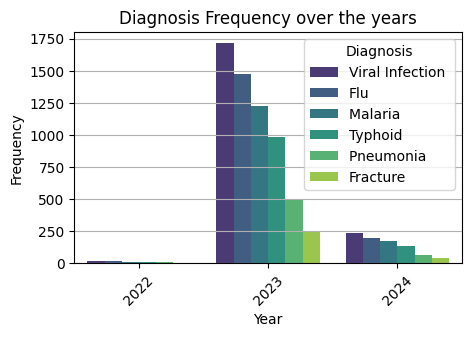

In [12]:
#Bar chart for the above
plt.figure(figsize=(5,3))
sns.barplot(data = freq1,x='Year',y='Frequency',hue='Diagnosis',palette = 'viridis')
plt.title("Diagnosis Frequency over the years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.xticks(rotation = 45)
plt.legend(title="Diagnosis")
plt.grid(axis='y')
plt.show()

In [90]:
#(ii) Identify the peak times for patient visits to optimize resource allocation.
visits = """
SELECT 
    DATE_FORMAT(Admit_Date,'%Y-%m-%d') as Admit_Date,
    YEAR(Admit_Date) AS Year,
    COUNT(*) AS Visit_Count
FROM 
    health
GROUP BY 
    Admit_Date, YEAR(Admit_Date) 
ORDER BY 
    Visit_Count DESC,YEAR(Admit_Date) DESC,Admit_Date DESC;
"""
mycursor.execute(visits)
col_vis = [column[0] for column in mycursor.description]
res_vis = mycursor.fetchall()
visits_df = pd.DataFrame(res_vis,columns = col_vis)
print(visits_df)

     Admit_Date  Year  Visit_Count
0    2023-01-20  2023           37
1    2023-01-17  2023           31
2    2023-01-24  2023           30
3    2023-01-21  2023           29
4    2023-01-19  2023           29
..          ...   ...          ...
451  2022-12-09  2022            1
452  2022-12-08  2022            1
453  2022-12-07  2022            1
454  2022-12-06  2022            1
455  2022-12-05  2022            1

[456 rows x 3 columns]


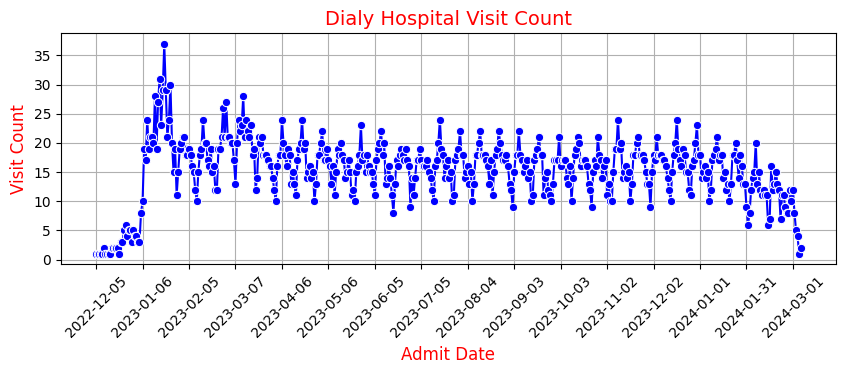

In [94]:
#Line Chart for the above
#As the Admit_Date values are of mingled so using sort_values
visits_df = visits_df.sort_values("Admit_Date")
plt.figure(figsize=(10,3))
sns.lineplot(data=visits_df,x='Admit_Date',y='Visit_Count',marker='o',color = 'blue')
plt.title('Dialy Hospital Visit Count',fontsize = 14,color = 'red')
plt.xlabel('Admit Date',fontsize = 12,color = 'red')
plt.ylabel('Visit Count',fontsize = 12,color = 'red')
plt.xticks(visits_df["Admit_Date"][::30], rotation=45) #Provides 30 day window in x-axis
plt.grid(True)
plt.show()

In [21]:
#2)Healthcare Facility Utilization:
#(i) Measure admission and discharge trends over time.
admis_trends = """
SELECT 
    DATE_FORMAT(Admit_Date,'%Y-%m-%d') AS Admit_Date,
    COUNT(*) AS Admissions,
    (SELECT COUNT(*) 
     FROM health h2 
     WHERE DATE(h2.Discharge_Date) = DATE(h1.Admit_Date)) AS Discharges
FROM 
    health h1
GROUP BY 
   Admit_Date
ORDER BY 
    Admit_Date ASC;
"""
mycursor.execute(admis_trends)
col_trend = [column[0] for column in mycursor.description]
res_trend = mycursor.fetchall()
admis_trends_df = pd.DataFrame(res_trend,columns=col_trend)
print(admis_trends_df)

     Admit_Date  Admissions  Discharges
0    2022-12-05           1           0
1    2022-12-06           1           0
2    2022-12-07           1           0
3    2022-12-08           1           0
4    2022-12-09           1           0
..          ...         ...         ...
451  2024-03-02           8          14
452  2024-03-03           5          14
453  2024-03-04           4          13
454  2024-03-05           1          14
455  2024-03-06           2          13

[456 rows x 3 columns]


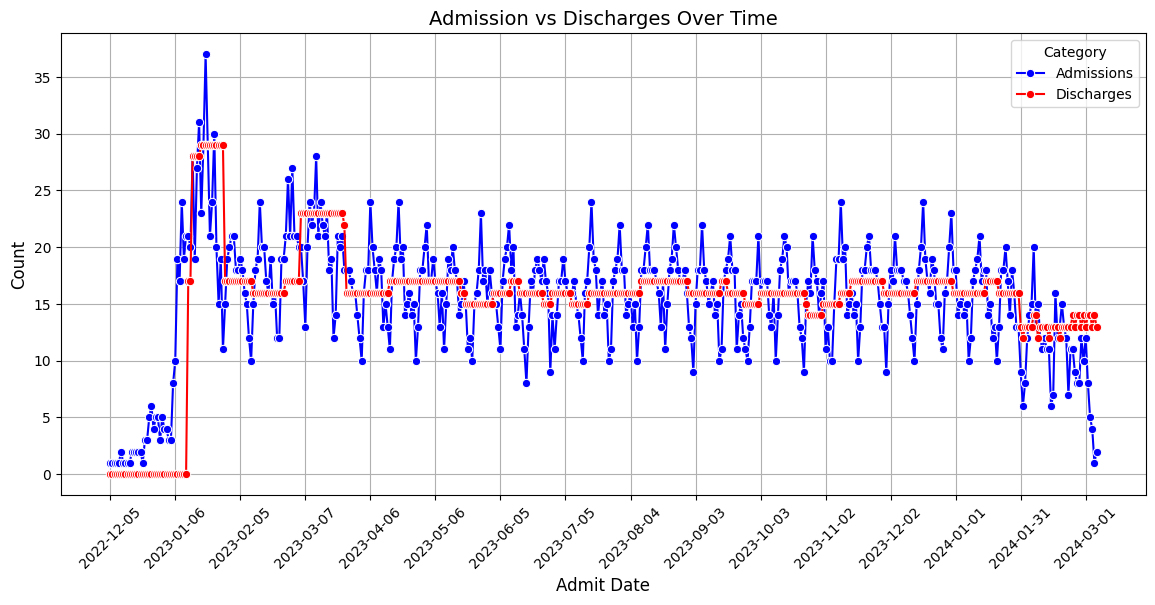

In [23]:
#Using Double line plot
plt.figure(figsize=(14,6))
sns.lineplot(data=admis_trends_df,x='Admit_Date',y='Admissions',label="Admissions",marker = 'o',color='blue')
sns.lineplot(data=admis_trends_df,x='Admit_Date',y='Discharges',label='Discharges',color='red',marker='o')
plt.title('Admission vs Discharges Over Time', fontsize = 14)
plt.xlabel('Admit Date',fontsize=12)
plt.ylabel('Count',fontsize = 12)
plt.legend(title='Category')
plt.xticks(admis_trends_df["Admit_Date"][::30], rotation=45)
plt.grid(True)
plt.show()

In [44]:
#Getting Count of Discharge_Date 
mon_discharge = """
SELECT
    DATE_FORMAT(Discharge_Date, '%Y-%m') AS Months, 
    COUNT(*) AS Monthly_Discharges
FROM health
GROUP BY Months
ORDER BY Months ASC;
"""
mycursor.execute(mon_discharge)
col_dis = [column[0] for column in mycursor.description]
res_dis = mycursor.fetchall()
mon_discharge_df = pd.DataFrame(res_dis,columns=col_dis)
print(mon_discharge_df)


     Months  Monthly_Discharges
0   2023-01                 516
1   2023-02                 461
2   2023-03                 646
3   2023-04                 496
4   2023-05                 501
5   2023-06                 479
6   2023-07                 488
7   2023-08                 518
8   2023-09                 478
9   2023-10                 479
10  2023-11                 487
11  2023-12                 513
12  2024-01                 499
13  2024-02                 379
14  2024-03                  95


In [95]:
#(ii) Monitor facility usage to prevent overcrowding and ensure efficient operations.
#For Bed_OCcupancy = ICU

occupancy = """
SELECT 
    Months,
    SUM(Monthly_Admissions) AS Monthly_Admissions,
    SUM(Monthly_Discharges) AS Monthly_Discharges
FROM (
    -- Admissions query
    SELECT 
        DATE_FORMAT(Admit_Date, '%Y-%m') AS Months,
        COUNT(DISTINCT Patient_ID) AS Monthly_Admissions,
        0 AS Monthly_Discharges
    FROM health
    WHERE Bed_Occupancy = 'ICU'
    GROUP BY Months

    UNION ALL

    -- Discharges query
    SELECT 
        DATE_FORMAT(Discharge_Date, '%Y-%m') AS Months,
        0 AS Monthly_Admissions,
        COUNT(DISTINCT Patient_ID) AS Monthly_Discharges
    FROM health
    WHERE Bed_Occupancy = 'ICU'
    GROUP BY Months
) AS combined
GROUP BY Months
ORDER BY Months ASC;

"""
mycursor.execute(occupancy)
col_occ = [column[0] for column in mycursor.description]
res_occ = mycursor.fetchall()
occupancy_df = pd.DataFrame(res_occ,columns=col_occ)
print(occupancy_df)

     Months Monthly_Admissions Monthly_Discharges
0   2022-12                 11                  0
1   2023-01                 98                 82
2   2023-02                 83                 78
3   2023-03                101                111
4   2023-04                 82                 84
5   2023-05                 85                 83
6   2023-06                 78                 79
7   2023-07                 84                 84
8   2023-08                 86                 77
9   2023-09                 76                 85
10  2023-10                 83                 82
11  2023-11                 79                 87
12  2023-12                 88                 84
13  2024-01                 78                 80
14  2024-02                 57                 66
15  2024-03                  6                 13


<Figure size 1000x600 with 0 Axes>

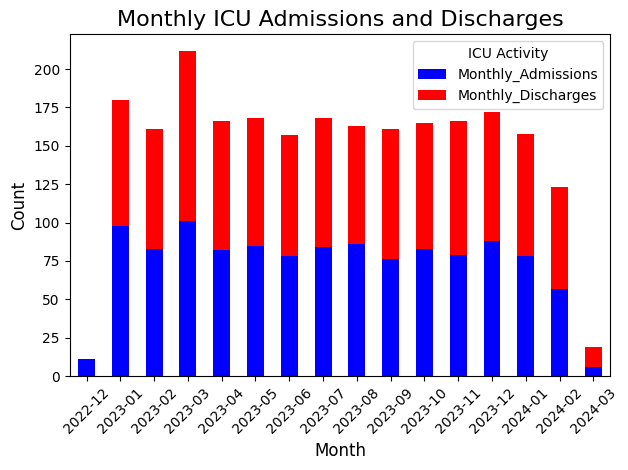

In [56]:
#Using Stacked Bar Chart
#This line is used to convert the Months column into Year-Month Format
occupancy_df['Months'] = pd.to_datetime(occupancy_df['Months'], format='%Y-%m')

#This line is used because i got an error in x-axis as'2022-12-01 00:00:00' so inorder to get as same as the Months column i used strftime format
occupancy_df['Months'] = occupancy_df['Months'].dt.strftime('%Y-%m')  

#Error comes as no numeric data found so using below method to change it to numeric
#Coerce is used to convert any non-numeric values to NaN and NaN will convert it to 0
occupancy_df['Monthly_Admissions'] = pd.to_numeric(occupancy_df['Monthly_Admissions'], errors='coerce').fillna(0)
occupancy_df['Monthly_Discharges'] = pd.to_numeric(occupancy_df['Monthly_Discharges'], errors='coerce').fillna(0)

plt.figure(figsize=(10, 6))
occupancy_df.set_index('Months')[['Monthly_Admissions', 'Monthly_Discharges']].plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Monthly ICU Admissions and Discharges', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend(title="ICU Activity")

plt.tight_layout()
plt.show()


In [96]:
#(ii) For Bed_Occupancy = 'Private'
occ_pvt = """
SELECT 
    Months,
    SUM(Monthly_Admissions) AS Monthly_Admissions,
    SUM(Monthly_Discharges) AS Monthly_Discharges
FROM (
    -- Admissions query
    SELECT 
        DATE_FORMAT(Admit_Date, '%Y-%m') AS Months,
        COUNT(DISTINCT Patient_ID) AS Monthly_Admissions,
        0 AS Monthly_Discharges
    FROM health
    WHERE Bed_Occupancy = 'Private'
    GROUP BY Months

    UNION ALL

    -- Discharges query
    SELECT 
        DATE_FORMAT(Discharge_Date, '%Y-%m') AS Months,
        0 AS Monthly_Admissions,
        COUNT(DISTINCT Patient_ID) AS Monthly_Discharges
    FROM health
    WHERE Bed_Occupancy = 'Private'
    GROUP BY Months
) AS combined
GROUP BY Months
ORDER BY Months ASC;

"""
mycursor.execute(occ_pvt)
col1_occ = [column[0] for column in mycursor.description]
res2_occ = mycursor.fetchall()
occ_pvt_df = pd.DataFrame(res2_occ,columns=col1_occ)
print(occ_pvt_df)

     Months Monthly_Admissions Monthly_Discharges
0   2022-12                 30                  0
1   2023-01                295                258
2   2023-02                249                224
3   2023-03                305                330
4   2023-04                246                243
5   2023-05                255                257
6   2023-06                232                236
7   2023-07                253                243
8   2023-08                256                267
9   2023-09                229                234
10  2023-10                251                236
11  2023-11                236                239
12  2023-12                261                259
13  2024-01                240                255
14  2024-02                166                189
15  2024-03                 15                 49


<Figure size 1000x600 with 0 Axes>

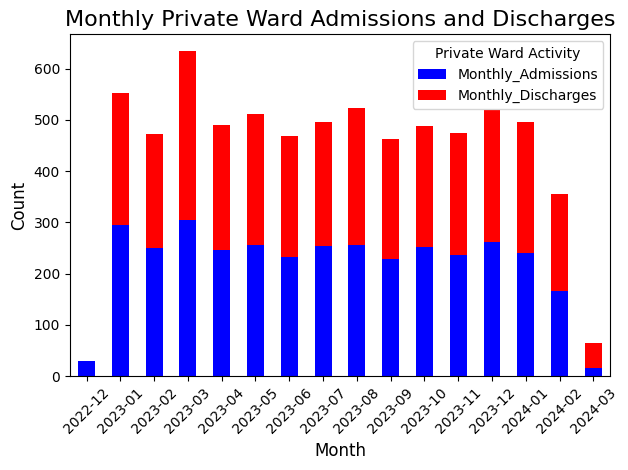

In [ ]:
#Using Stacked Bar Chart
#This line is used to convert the Months column into Year-Month Format
occ_pvt_df['Months'] = pd.to_datetime(occ_pvt_df['Months'], format='%Y-%m')

#This line is used because i got an error in x-axis as'2022-12-01 00:00:00' so inorder to get as same as the Months column i used strftime format
occ_pvt_df['Months'] = occ_pvt_df['Months'].dt.strftime('%Y-%m')  

#Error comes as no numeric data found so using below method to change it to numeric
#Coerce is used to convert any non-numeric values to NaN and NaN will convert it to 0
occ_pvt_df['Monthly_Admissions'] = pd.to_numeric(occ_pvt_df['Monthly_Admissions'], errors='coerce').fillna(0)
occ_pvt_df['Monthly_Discharges'] = pd.to_numeric(occ_pvt_df['Monthly_Discharges'], errors='coerce').fillna(0)

plt.figure(figsize=(10, 6))
occ_pvt_df.set_index('Months')[['Monthly_Admissions', 'Monthly_Discharges']].plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Monthly Private Ward Admissions and Discharges', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45) 
plt.legend(title="Private Ward Activity")

plt.tight_layout()
plt.show()


In [97]:
#(iii) For Bed Occupancy = General
occ_gen = """
SELECT 
    Months,
    SUM(Monthly_Admissions) AS Monthly_Admissions,
    SUM(Monthly_Discharges) AS Monthly_Discharges
FROM (
    -- Admissions query
    SELECT 
        DATE_FORMAT(Admit_Date, '%Y-%m') AS Months,
        COUNT(DISTINCT Patient_ID) AS Monthly_Admissions,
        0 AS Monthly_Discharges
    FROM health
    WHERE Bed_Occupancy = 'General'
    GROUP BY Months

    UNION ALL

    -- Discharges query
    SELECT 
        DATE_FORMAT(Discharge_Date, '%Y-%m') AS Months,
        0 AS Monthly_Admissions,
        COUNT(DISTINCT Patient_ID) AS Monthly_Discharges
    FROM health
    WHERE Bed_Occupancy = 'General'
    GROUP BY Months
) AS combined
GROUP BY Months
ORDER BY Months ASC;
"""
mycursor.execute(occ_gen)
col_gen = [column[0] for column in mycursor.description]
res_gen = mycursor.fetchall()
occ_gen_df = pd.DataFrame(res_gen,columns=col_gen)
print(occ_gen_df)

     Months Monthly_Admissions Monthly_Discharges
0   2022-12                 20                  0
1   2023-01                197                176
2   2023-02                165                159
3   2023-03                203                205
4   2023-04                165                169
5   2023-05                169                161
6   2023-06                156                164
7   2023-07                168                161
8   2023-08                171                174
9   2023-09                153                159
10  2023-10                167                161
11  2023-11                157                161
12  2023-12                175                170
13  2024-01                157                164
14  2024-02                107                124
15  2024-03                 11                 33


<Figure size 1000x600 with 0 Axes>

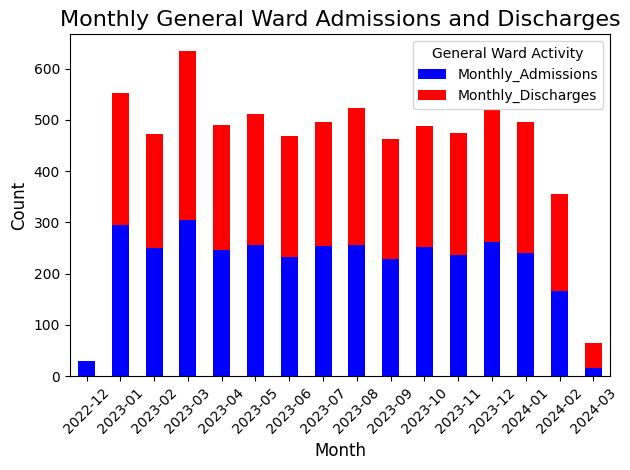

In [ ]:
#Using Stacked Bar Chart
#This line is used to convert the Months column into Year-Month Format
occ_gen_df['Months'] = pd.to_datetime(occ_gen_df['Months'], format='%Y-%m')

#This line is used because i got data in x-axis as'2022-12-01 00:00:00' so inorder to get as same as the Months column i used strftime format
occ_gen_df['Months'] = occ_gen_df['Months'].dt.strftime('%Y-%m')  

#Error comes as no numeric data found so using below method to change it to numeric
#Coerce is used to convert any non-numeric values to NaN and NaN will convert it to 0
occ_gen_df['Monthly_Admissions'] = pd.to_numeric(occ_gen_df['Monthly_Admissions'], errors='coerce').fillna(0)
occ_gen_df['Monthly_Discharges'] = pd.to_numeric(occ_gen_df['Monthly_Discharges'], errors='coerce').fillna(0)

plt.figure(figsize=(10, 6))
occ_pvt_df.set_index('Months')[['Monthly_Admissions', 'Monthly_Discharges']].plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Monthly General Ward Admissions and Discharges', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45) 
plt.legend(title="General Ward Activity")

plt.tight_layout()
plt.show()
